In [1]:
# 调用库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 混淆矩阵函数
def plot_cm(y, yp):

    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
    cm = confusion_matrix(y, yp)  # 混淆矩阵

    plt.figure()
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar()  # 颜色标签

    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(
                x, y), horizontalalignment='center', verticalalignment='center')

    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

#ROC曲线图
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    
    '''保存图片代码插入到这里'''
    
    plt.show()

In [3]:
# 导入数据
data = pd.read_csv(r'C:\Users\DELL\Desktop\data_new.csv')
data = data.dropna()
data.head()

,L,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,AVG_FLIGHT_COUNT,...,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,Points_Sum,Point_NotFlight,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,result
0,90.200000,0.0,6,31.0,210,239560.0,234188.0,580717,558440.14,26.250,...,259111,74460,39992,114452,619760,50,3352,36640,34,0
1,86.566667,0.0,6,42.0,140,171483.0,167434.0,293678,367777.20,17.500,...,185122,41288,12000,53288,415768,33,0,12000,29,0
2,87.166667,0.0,6,40.0,135,163618.0,164982.0,283712,355966.50,16.875,...,182087,39711,15491,55202,406361,26,3491,12000,20,0
3,68.233333,0.0,5,64.0,23,116350.0,125500.0,281336,306900.88,2.875,...,151210,34890,0,34890,372204,12,0,0,11,1
4,60.533333,0.0,6,48.0,152,124560.0,130702.0,309928,300834.06,19.000,...,145396,42265,22704,64969,338813,39,0,22704,27,0


In [4]:
# 确定特征值和目标值
x = data.iloc[:, 0:28] # 这里根据你的数据量改变
y = data["result"]

In [5]:
#分割数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.8)

In [6]:
# 特征工程(标准化)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [7]:
# 机器学习(逻辑回归)
#estimator = LogisticRegression(max_iter=1000,C=10, penalty='l2') # C是正则项前面系数的倒数;penalty是使用l1正则项还是l2正则项
# 随机森林
estimator = RandomForestClassifier(min_samples_split=2,min_samples_leaf=1,n_estimators=100)
# 梯度上升树
#estimator = GradientBoostingClassifier(loss='deviance',learning_rate=0.3,n_estimators=120,max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features=13,verbose=1)
# SVM 这个运行时间好长
#estimator = svm.SVC(probability=True)
# CART决策树 这个ROC曲线是折线 （测试集的结果【1,0,1】  训练出来的结果【1,0,1】）
#estimator = DecisionTreeClassifier()

estimator.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0463           17.73s
         2           0.9066           18.11s
         3           0.8016           18.77s
         4           0.7453           18.79s
         5           0.6870           18.87s
         6           0.6369           19.11s
         7           0.5992           19.06s
         8           0.5775           18.94s
         9           0.5496           19.08s
        10           0.5222           19.01s
        20           0.3900           17.42s
        30           0.3320           15.93s
        40           0.2923           14.48s
        50           0.2643           12.84s
        60           0.2437           11.17s
        70           0.2289            9.38s
        80           0.2135            7.71s
        90           0.2023            6.08s
       100           0.1916            4.38s


GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features=13,
                           n_estimators=120, verbose=1)

In [8]:
# 模型评估
y_predict = estimator.predict(x_test)
print(y_predict)
print(estimator.score(x_test,y_test))
print("召回率：", classification_report(y_test, y_predict, labels=[0, 1], target_names=["未流失", "已流失"]))

[0 0 1 ... 0 1 0]
0.945967872789226
召回率：               precision    recall  f1-score   support

         未流失       0.94      0.97      0.96      7628
         已流失       0.95      0.91      0.93      4698

    accuracy                           0.95     12326
   macro avg       0.95      0.94      0.94     12326
weighted avg       0.95      0.95      0.95     12326



<Figure size 432x288 with 0 Axes>

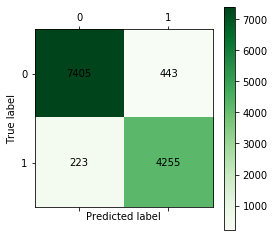

In [9]:
plot_cm(y_test, y_predict).show() #这条语句可能会报错但是还是可以显示出图片，网上说是tight_layout在plt.savefig的调用方式相对比较稳定，我们将plt.show()函数替换为plt.savefig函数
#plot_cm(y_test, y_predict).savefig(r'C:\Users\DELL\Desktop\breast-cancer-wisconsin.png', bbox_inches='tight')

[0.02145323 0.01678584 0.99972151 ... 0.01436917 0.99015001 0.00523007]


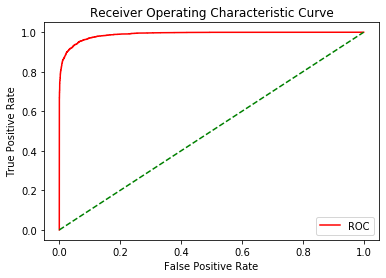

In [10]:
prob = estimator.predict_proba(x_test)
print(prob[:, 1])
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test.values, prob)
plot_roc_curve(fper, tper)